In [1]:
import numpy as np

from sklearn.datasets import make_classification # para gerar os dados sintéticos
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

import matplotlib.pyplot as plt

## Implementações - Organizar saída e testes e comentar tudo tá faltando
- Perceptron
- MLP (MultiLayer Perceptron)

In [2]:
# Esse foi o código dado, não irei mexer nele

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)                           # Container for the Mersenne Twister pseudo-random number generator.
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])           # Draw random samples from a normal (Gaussian) distribution.
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
class MLP(object):
    """Multi-Layer Perceptron classifier.

    Parameters
    ------------
    hidden_layers : tuple, optional (default=(10,))
        Tuple specifying the number of units in each hidden layer.
    eta : float, optional (default=0.01)
        Learning rate (between 0.0 and 1.0).
    n_iter : int, optional (default=50)
        Passes over the training dataset.
    random_state : int, optional (default=1)
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    weights_ : list of arrays
        Weights for each layer after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, hidden_layers=(32,), eta=0.1, n_iter=100, random_state=42):
        self.hidden_layers = hidden_layers
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        # Inicialização dos pesos aleatórios
        # Inicialização dos pesos da camada de entrada para a primeira camada oculta
        # Inicialização dos pesos das camadas ocultas
        rgen = np.random.RandomState(self.random_state)
        self.weights_ = []
        self.weights_.append(rgen.normal(loc=0.0, scale=0.01, size=(X.shape[1] + 1, self.hidden_layers[0])))
       
        for i in range(1, len(self.hidden_layers)):
            self.weights_.append(rgen.normal(loc=0.0, scale=0.01, size=(self.hidden_layers[i-1] + 1, self.hidden_layers[i])))

        self.weights_.append(rgen.normal(loc=0.0, scale=0.01, size=(self.hidden_layers[-1] + 1, 1)))

        self.errors_ = []

        # Loop de treinamento
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # Propagação Forward
                activations = self._forward_pass(xi)
                
                # Previsão binária com base no retorno da camada de saída
                predictions = np.where(activations[-1] >= 0.5, 1, -1)
                if predictions != target:
                    errors += 1
                    
                    # Backpropagation para atualizar os pesos
                    self._backward_pass(activations, target)
            self.errors_.append(errors)

        return self


    # Propagação Forward, onde são feitas as predições pelas camadas
    def _forward_pass(self, X):
        activations = [X]
        for weights in self.weights_:
            net_input = np.dot(activations[-1], weights[1:]) + weights[0]
            activation = self._activation(net_input)
            activations.append(activation)
        return activations

    # Propagação Backward onde vamos calculando os erros e atualizando pesos pelas camadas
    def _backward_pass(self, activations, target):
        errors = [target - activations[-1]]
        for i in range(len(self.weights_) - 1, 0, -1):
            error = np.dot(errors[-1], self.weights_[i][1:].T)
            errors.append(error)
        errors.reverse()

        for i in range(len(self.weights_) - 1, -1, -1):
            # Backpropagation
            self.weights_[i][1:] += self.eta * activations[i].reshape(-1, 1) * errors[i]
            self.weights_[i][0] += self.eta * errors[i].sum()

    def _activation(self, X):
        # Função de ativação sigmoide, boa para classificação binária
        return 1 / (1 + np.exp(-X))

    # Previsão binária com base nas ativações da camada de saída
    def predict(self, X):
        activations = self._forward_pass(X)
        return np.where(activations[-1] >= 0.5, 1, -1)


## Implementação de funções
- Cálculo da Acurácia
- Validação Cruzada para Avaliação do Modelo

In [4]:
# Uma funçãozinha simples de cálculo da acurácia

def calculate_accuracy(model, X, y):
    predictions = model.predict(X).flatten()
    accuracy = np.mean(predictions == y)
    return accuracy

In [5]:
def CrossValidation(model_name, data, num_folds):
    np.random.shuffle(data)
    # Dá um Shuffle nos dados
    # Separa os dados
    # Dados de entrada (X) e rótulos (y
    X = data[:, :2]
    y = data[:, 2]

    # Definir o número de folds e o tamanho de cada fold
    fold_size = len(X) // num_folds

    accuracies = []

    # Loop de validação cruzada
    for i in range(num_folds):
        if model_name == "MLP":
            # Criar instância do objeto MLP
            model = MLP()
        elif model_name == "Perceptron":
            model = Perceptron(eta=0.1, n_iter=200)
            
        # Dividir os dados em conjuntos de treinamento e teste para cada fold
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size

        X_test = X[start_idx:end_idx]
        y_test = y[start_idx:end_idx]

        X_train = np.concatenate([X[:start_idx], X[end_idx:]])
        y_train = np.concatenate([y[:start_idx], y[end_idx:]])

        # Treinar o modelo (Perceptron ou MLP)
        model.fit(X_train, y_train)
        
        accuracy = calculate_accuracy(model, X_test, y_test.flatten())
        print("Acurácia da Iteração número",i + 1, ": ", accuracy)
        
        accuracies.append(accuracy)

    # Calcular a média e desvio padrão das acurácias
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    
    print("Acurácia Média da Cross-Validação: ", mean_accuracy)
    print("Desvio-Padrão da Cross-Validação: ", std_accuracy)

## Criação dos dados sintéticos
Aqui são criados dois datasets sintéticos balanceados, um que é linearmente separável, o outro não é linearmente separável.

Text(0.5, 1.0, 'Dados Linearmente Separáveis')

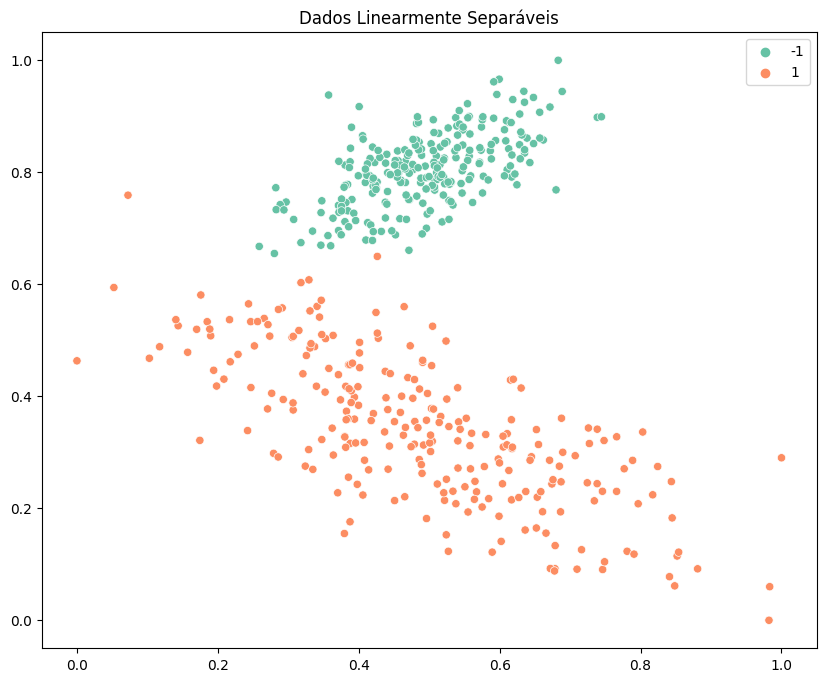

In [6]:
# Criando dados linearmente separáveis

X_ls, y_ls = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=1.1, 
    random_state=18,
    flip_y=-1
)

scaler = MinMaxScaler()
X_ls = scaler.fit_transform(X_ls)

y_ls[y_ls == 0] = -1

f, ax1 = plt.subplots(figsize=(10,8))
sns.scatterplot(x = X_ls[:,0],y = X_ls[:,1],hue=y_ls,ax=ax1, palette="Set2")
ax1.set_title("Dados Linearmente Separáveis")

Text(0.5, 1.0, 'Dados Não Linearmente Separáveis')

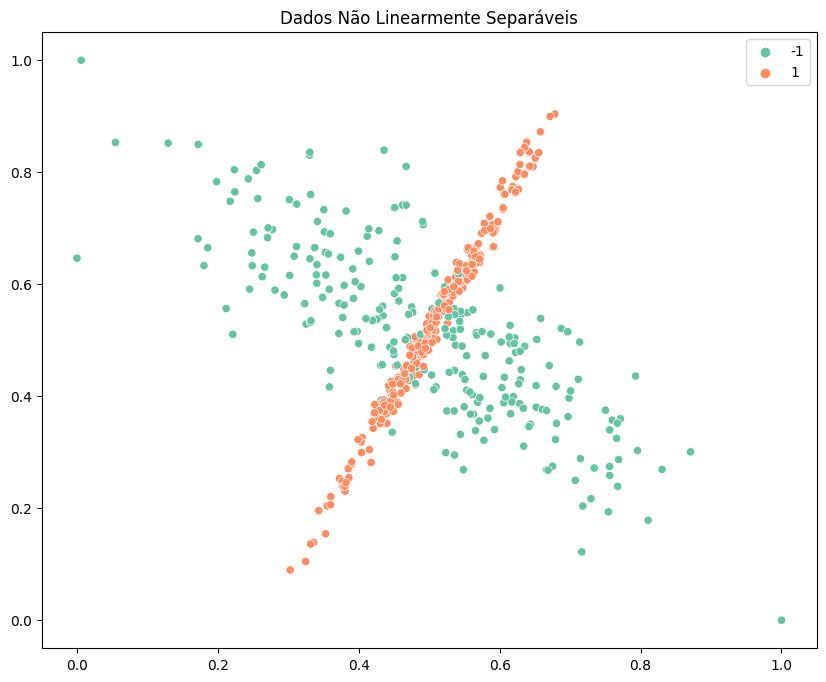

In [7]:
# Criando dados não linearmente separáveis

# Ver se mudo esse código depois

X_nl, y_nl = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=0, 
    random_state=42,
    flip_y=0
)

scaler = MinMaxScaler()
X_nl = scaler.fit_transform(X_nl)

y_nl[y_nl == 0] = -1

f, ax1 = plt.subplots(figsize=(10,8))
sns.scatterplot(x = X_nl[:,0],y = X_nl[:,1],hue=y_nl,ax=ax1, palette="Set2")
ax1.set_title("Dados Não Linearmente Separáveis")


In [8]:
X_ls = np.array(X_ls)
y_ls = np.array(y_ls)

X_nl = np.array(X_nl)
y_nl = np.array(y_nl)

In [9]:
data_ls = np.hstack((X_ls, y_ls.reshape(-1, 1)))

data_nl = np.hstack((X_nl, y_nl.reshape(-1, 1)))

In [10]:
print("Dados Linearmente Separáveis")
print("Resultados do Perceptron: ")

CrossValidation("Perceptron", data_ls, 5)

print("Resultados do MLP: ")

CrossValidation("MLP", data_ls, 5)

Dados Linearmente Separáveis
Resultados do Perceptron: 
Acurácia da Iteração número 1 :  0.98
Acurácia da Iteração número 2 :  1.0
Acurácia da Iteração número 3 :  0.99
Acurácia da Iteração número 4 :  1.0
Acurácia da Iteração número 5 :  1.0
Acurácia Média da Cross-Validação:  0.994
Desvio-Padrão da Cross-Validação:  0.008000000000000007
Resultados do MLP: 
Acurácia da Iteração número 1 :  1.0
Acurácia da Iteração número 2 :  1.0
Acurácia da Iteração número 3 :  0.92
Acurácia da Iteração número 4 :  0.99
Acurácia da Iteração número 5 :  0.89
Acurácia Média da Cross-Validação:  0.96
Desvio-Padrão da Cross-Validação:  0.046043457732885346


In [11]:
print("Dados Não Linearmente Separáveis")
print("Resultados do Perceptron: ")

CrossValidation("Perceptron", data_nl, 5)

print("Resultados do MLP: ")

CrossValidation("MLP", data_nl, 5)

Dados Não Linearmente Separáveis
Resultados do Perceptron: 
Acurácia da Iteração número 1 :  0.44
Acurácia da Iteração número 2 :  0.53
Acurácia da Iteração número 3 :  0.59
Acurácia da Iteração número 4 :  0.44
Acurácia da Iteração número 5 :  0.51
Acurácia Média da Cross-Validação:  0.502
Desvio-Padrão da Cross-Validação:  0.05706137047074842
Resultados do MLP: 
Acurácia da Iteração número 1 :  0.49
Acurácia da Iteração número 2 :  0.49
Acurácia da Iteração número 3 :  0.52
Acurácia da Iteração número 4 :  0.49
Acurácia da Iteração número 5 :  0.51
Acurácia Média da Cross-Validação:  0.5
Desvio-Padrão da Cross-Validação:  0.012649110640673528
